<a href="https://colab.research.google.com/github/SJSY126/gasyori100/blob/master/01_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install  --user numpy matplotlib opencv-python sklearn scikit-image --upgrade

Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.18.5)
Requirement already up-to-date: matplotlib in /usr/local/lib/python3.6/dist-packages (3.2.1)
     |████████████████████████████████| 28.2MB 107kB/s 
Requirement already up-to-date: sklearn in /usr/local/lib/python3.6/dist-packages (0.0)
     |████████████████████████████████| 12.4MB 38.1MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


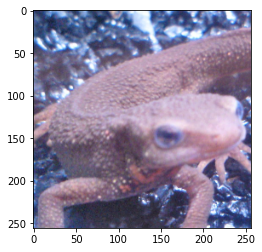

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io

img_orig = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/assets/imori_256x256.png')

plt.imshow(img_orig)
plt.show()

# 01　チャネル入れ替え

In [27]:
img_orig.shape

(256, 256, 3)

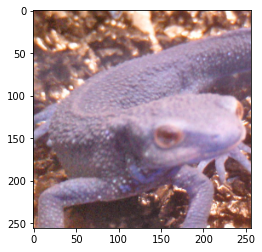

In [28]:
ans[:,:,0] = img_orig[:,:,2]
ans[:,:,1] = img_orig[:,:,1]
ans[:,:,2] = img_orig[:,:,0]
plt.imshow(ans)
plt.show()

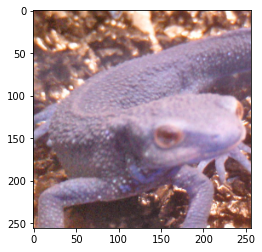

In [29]:
ans = img_orig[...,::-1]
plt.imshow(ans)
plt.show()

#02　グレースケール

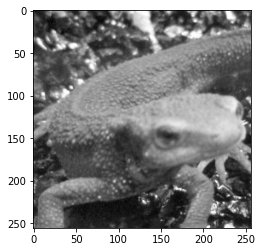

In [49]:
_img = img_orig.copy().astype(np.float32)
ans=0.2126*_img[...,0]+0.7153*_img[...,1]+0.0722*_img[...,2]
ans = np.clip(ans,0,255).astype(np.uint8)
plt.imshow(ans, cmap="gray")
plt.show()

In [0]:
def rgb2gray(img):
    _img = img.copy().astype(np.float32)
    ans=0.2126*_img[...,0]+0.7153*_img[...,1]+0.0722*_img[...,2]
    return np.clip(ans,0,255).astype(np.uint8)

#03　二値化

255


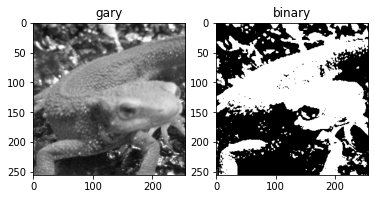

In [70]:
_img = img_orig.copy().astype(np.float32)
gray = rgb2gray(_img)
ans = np.minimum(gray//128, 1)*255
print(ans[100,100])
ans = ans.astype(np.uint8)

plt.figure()
plt.subplot(1,2,1)
plt.title("gary")
plt.imshow(gray, cmap='gray')
plt.subplot(1,2,2)
plt.title("binary")
plt.imshow(ans, cmap="gray")
plt.show()

In [0]:
def binary(img,th):
    _img = img.copy().astype(np.float32)
    gray = rgb2gray(_img)
    binary = np.minimum(gray//th, 1)
    binary = np.clip(binary,0,255)
    return binary.astype(np.uint8)

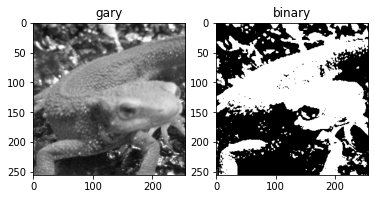

In [98]:
ans = binary(img_orig,128)

plt.figure()
plt.subplot(1,2,1)
plt.title("gary")
plt.imshow(gray, cmap='gray')
plt.subplot(1,2,2)
plt.title("binary")
plt.imshow(ans, cmap="gray")
plt.show()